# Pump Example Notebook
This script shows basic I/O operations that can be performed with this toolkit, as well as some of the basic model and simulation visualization and analysis features.

This script runs these basic operations on the simple model defined in ex_pump.py.

In [66]:
import networkx as nx
import fmdtools.sim.propagate as propagate
from fmdtools import analyze as an
from ex_pump import *
from IPython.display import HTML

### Initial Model Checks
Before seeing how faults propagate, it's useful to see that the model structure is set up correctly and that the system performs as expected.

In [2]:
mdl = Pump()

One of the easiest ways to visualize this is by viewing the model in the repl, which shows thes states and modes of the component functions and flows.

In [3]:
mdl

Pump model at 0x133ac981280 
FUNCTIONS: 
import_ee ImportEE
- ImportEEState(effstate=1.0)
- ImportEEMode(mode=nominal, faults=set())
import_water ImportWater
- State()
- ImportWaterMode(mode=nominal, faults=set())
import_signal ImportSig
- State()
- ImportSigMode(mode=nominal, faults=set())
move_water MoveWat
- MoveWatStates(eff=1.0)
- MoveWatMode(mode=nominal, faults=set())
export_water ExportWater
- State()
- ExportWaterMode(mode=nominal, faults=set())
FLOWS: 
ee_1 Electricity flow: EEStates(current=1.0, voltage=1.0)
sig_1 Signal flow: SignalStates(power=1.0)
wat_1 Water flow: WaterStates(flowrate=1.0, pressure=1.0, area=1.0, level=1.0)
wat_2 Water flow: WaterStates(flowrate=1.0, pressure=1.0, area=1.0, level=1.0)

#### Model Structure Visualization

To check that the simulation structures are set up right, the ModelGraph class lets us visualize the function/flow relationships in the model. This helps us answer the questions:
   - are all functions on the graph?
   - are the functions connected with the correct flows?

In [4]:
from fmdtools.analyze.graph import ModelGraph

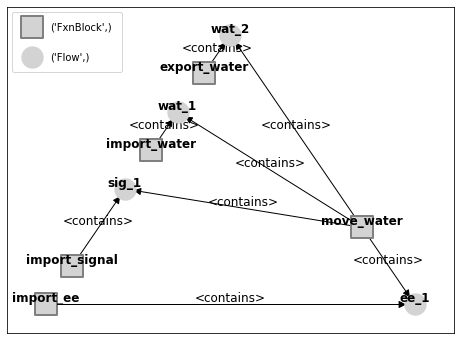

In [5]:
a=ModelGraph(mdl)
fig, ax = a.draw(figsize=(8,6))

Note that a variety of different Classes can be used for model structure visualization, inlcluding `ModelFxnGraph`, `ModelFlowGraph`, and `ModelTypeGraph`. This is further explained in `examples/rover/Model_Structure_Visualization_Tutorial.ipynb`

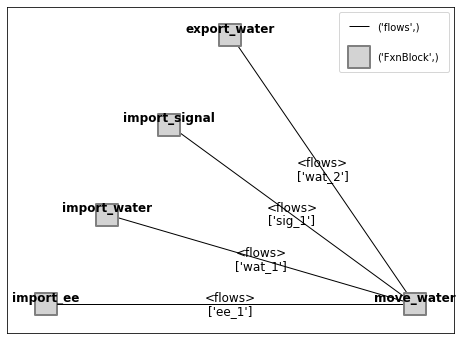

In [8]:
from fmdtools.analyze.graph import ModelFxnGraph
b=ModelFxnGraph(mdl)
fig = b.draw(figsize=(8,6))

#### Nominal Run

The next code runs the model in the nominal state to check to see that the model has been defined correctly.
Some things worth checking:
   - do any faults occur in the nominal state?
   - do all the flow states proceed as desired over time?

The following code runs the model with no faults to let us do that. The inputs are:
- mdl (the model we imported at the start of the script)
- track (which model aspects to track)
- desired_result (str/list/dict describing what to return in result)
- **kwargs (see docs)

The outputs are:
- result (a dictionary corresponding to 
- mdlhist (the states of the functions and flows over time)

In [9]:
result, mdlhist=propagate.nominal(mdl, track='all', desired_result={'graph':ModelGraph})

In [10]:
result.graph

With these results, we can now plot the graph of results resgraph using:

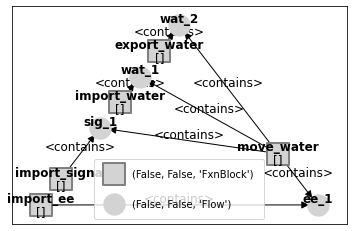

In [11]:
fig = result.graph.draw(figsize=(6,4))

As can be seen, this gives a graphical representation of the functional model with the various flows. Since all of the functions are *grey*, no faults were accidentally introduced in this run.


We can further look at the states of the model using `an.plot.hist`:

In [12]:
mdlhist

i.finished:                    array(56)
i.on:                          array(56)
fxns.import_ee.s.effstate:     array(56)
fxns.import_ee.m.faults.no_v:  array(56)
fxns.import_ee.m.faults.inf_v: array(56)
fxns.import_ee.m.mode:         array(56)
fxns.import_water.m.faults.no_wat: array(56)
fxns.import_water.m.mode:      array(56)
fxns.import_signal.m.faults.no_sig: array(56)
fxns.import_signal.m.mode:     array(56)
fxns.move_water.i.over_pressure: array(56)
fxns.move_water.s.eff:         array(56)
fxns.move_water.m.faults.mech_break: array(56)
fxns.move_water.m.faults.short: array(56)
fxns.move_water.m.mode:        array(56)
fxns.move_water.t.pressure_limit.time: array(56)
fxns.move_water.t.pressure_limit.mode: array(56)
fxns.export_water.m.faults.block: array(56)
fxns.export_water.m.mode:      array(56)
flows.ee_1.s.current:          array(56)
flows.ee_1.s.voltage:          array(56)
flows.sig_1.s.power:           array(56)
flows.wat_1.s.flowrate:        array(56)
flows.wat_1.s.pressu

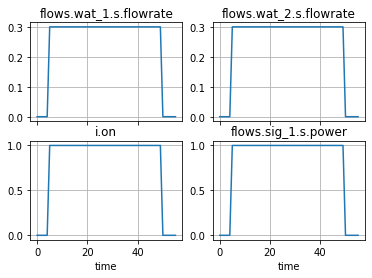

In [21]:
fig, ax = an.plot.hist(mdlhist ,'flows.wat_1.s.flowrate', 
                       'flows.wat_2.s.flowrate', 
                       'i.on', 'flows.sig_1.s.power')

As we can see, the state of these flows does exactly what we would expect--when the switch turns on at $t=5$, the pump switches on and there is a flow of water in and out of the model.

### History
If we want to see this data in tabular form, we can use `fp.tabulate.hist()`:

In [22]:
nominal_histtable = mdlhist.as_table()
nominal_histtable[:10] #only displaying 10 

,i.finished,i.on,fxns.import_ee.s.effstate,fxns.import_ee.m.faults.no_v,fxns.import_ee.m.faults.inf_v,fxns.import_ee.m.mode,fxns.import_water.m.faults.no_wat,fxns.import_water.m.mode,fxns.import_signal.m.faults.no_sig,fxns.import_signal.m.mode,...,flows.sig_1.s.power,flows.wat_1.s.flowrate,flows.wat_1.s.pressure,flows.wat_1.s.area,flows.wat_1.s.level,flows.wat_2.s.flowrate,flows.wat_2.s.pressure,flows.wat_2.s.area,flows.wat_2.s.level,time
0,False,False,1.0,False,False,nominal,False,nominal,False,nominal,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
1,False,False,1.0,False,False,nominal,False,nominal,False,nominal,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
2,False,False,1.0,False,False,nominal,False,nominal,False,nominal,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0
3,False,False,1.0,False,False,nominal,False,nominal,False,nominal,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,3.0
4,False,False,1.0,False,False,nominal,False,nominal,False,nominal,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0
5,False,True,1.0,False,False,nominal,False,nominal,False,nominal,...,1.0,0.3,10.0,1.0,1.0,0.3,10.0,1.0,1.0,5.0
6,False,True,1.0,False,False,nominal,False,nominal,False,nominal,...,1.0,0.3,10.0,1.0,1.0,0.3,10.0,1.0,1.0,6.0
7,False,True,1.0,False,False,nominal,False,nominal,False,nominal,...,1.0,0.3,10.0,1.0,1.0,0.3,10.0,1.0,1.0,7.0
8,False,True,1.0,False,False,nominal,False,nominal,False,nominal,...,1.0,0.3,10.0,1.0,1.0,0.3,10.0,1.0,1.0,8.0
9,False,True,1.0,False,False,nominal,False,nominal,False,nominal,...,1.0,0.3,10.0,1.0,1.0,0.3,10.0,1.0,1.0,9.0


This table is a pandas dataframe. We can save this dataframe to a .csv using `nominal_histtable.to_csv("filename.csv")`

### Propagating and Viewing Results for Individual Faults
It is often necessary to see how the system reacts to individual faults. This can gives us better understanding of how the system behaves under individual faults and can let us iterate with the model better.

The following code runs the model with a single fault in a single function. In this case, we are initiating a short in the 'Move Water' function at 10 hours into the system's operation.

The inputs are:
- mdl (the model we imported at the start of the script)
- Function (the function the fault we're interested in propagating occurs in)
- faultmode (the fault to initiate)
- time (the time when the fault is initiated)
- **kwargs )

The outputs are (the same as propogate.nominal):
- results (a dictionary corresponding to desired_results)
- mdlhist (the states of the model over time)

In [31]:
endresults, mdlhist=propagate.one_fault(mdl, 'move_water', 'short', time=10, 
                                        desired_result=['graph','endclass','endfaults'])

`History.get_degraded_hist` compares the results over time so we can see what functions and flows were degraded over time. We can then use the summary to view a list of the functions and flows that were impacted over time.

In [32]:
deghist = mdlhist.get_degraded_hist(*mdl.fxns, *mdl.flows)

In [33]:
deghist

ee_1:                          array(56)
wat_2:                         array(56)
total:                         array(56)
time:                          array(56)

In [34]:
deghist.as_table()

,ee_1,wat_2,total,time
0,1,1,0,0.0
1,1,1,0,1.0
2,1,1,0,2.0
3,1,1,0,3.0
4,1,1,0,4.0
5,1,1,0,5.0
6,1,1,0,6.0
7,1,1,0,7.0
8,1,1,0,8.0
9,1,1,0,9.0


We can also see what happens with the graph view:

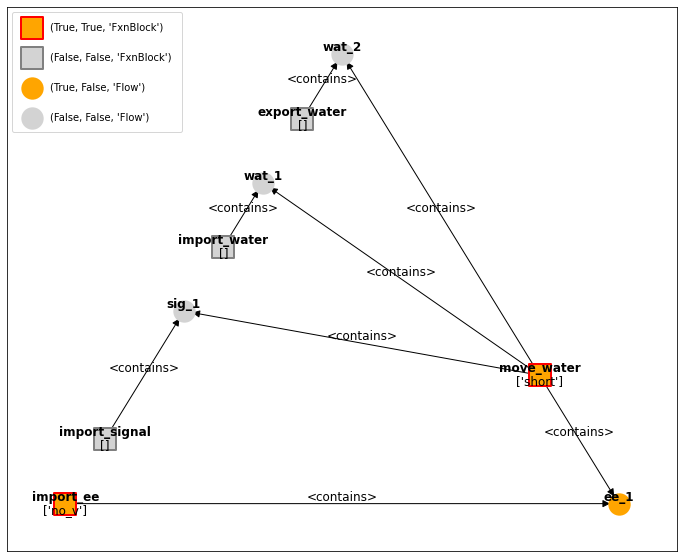

In [36]:
fig = endresults.graph.draw()

In [37]:
endresults.graph.g.nodes['move_water']

{'bipartite': 0,
 'label': 'FxnBlock',
 'states': {'eff': 0.0},
 'faults': ['short'],
 'degraded': True,
 'faulty': True}

As can be seen, at the final t, the short causes a degraded flow of electricity as well as a fault in the Import EE function. 

However, we would imagine that the short would cause the water to stop moving also--so why is it not red?

The answer is that by default the degradations shown in the graph are shown at the **final time**, which is the same both for the failed model and the nominal model, since the pump is switched "off." In this case we might be more interested in looking at how the graph looks in operation, rather than at the end.

We can do that that in two ways:
- by specifying a different time to fetch the graph from (e.g., desired_result={10:'graph'}, or
- by reconstructing the based on the history of the plot, as shown below:

In [42]:
mg = ModelGraph(mdl)

To do this, we first need to track more states than have been specified to track in the model. The easiest way to do this is to set `track='all'`.

In [47]:
endresults, mdlhist_full=propagate.one_fault(mdl, 'move_water', 'short', time=10, track='all',
                                        desired_result=['graph','endclass','endfaults'])

We can then plot the state at any time in the history using `mg.draw_from`.

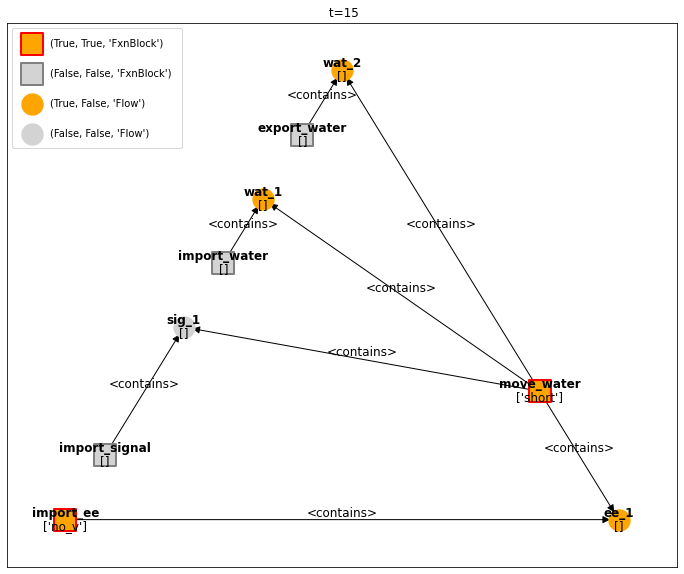

In [49]:
fig, ax = mg.draw_from(15, mdlhist_full)

As shown, this version has the degradation of the water, since at this time the off-nominal state is different from the nominal (no flow).

We can view an animation over time using:

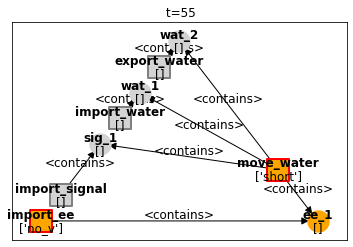

In [58]:
from IPython.display import HTML
ani = mg.animate_from(mdlhist_full)
HTML(ani.to_jshtml())

Note that if only a partial history is given, only partial results will be displayed (see below).

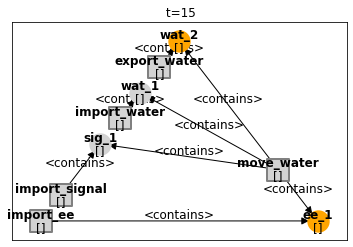

In [62]:
fig, ax = mg.draw_from(15, mdlhist, figsize=(6,4), withlegend=False)

We can also plot the states of this against the nominal run using:

In [72]:
mdlhist

nominal.i.finished:            array(56)
nominal.i.on:                  array(56)
nominal.flows.ee_1.s.current:  array(56)
nominal.flows.wat_2.s.flowrate: array(56)
nominal.time:                  array(56)
faulty.i.finished:             array(56)
faulty.i.on:                   array(56)
faulty.flows.ee_1.s.current:   array(56)
faulty.flows.wat_2.s.flowrate: array(56)
faulty.time:                   array(56)

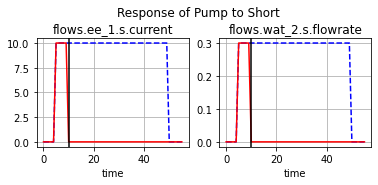

In [75]:
fig, axs = an.plot.hist(mdlhist, 'flows.ee_1.s.current', 'flows.wat_2.s.flowrate', 
                        title="Response of Pump to Short", time_slice=10, legend_loc=False, title_padding=0.1)

As you can see, the system begins nominal until the fault is injected at $t=10$. At this moment, not only are the electrical energy flows degraded, the flow of water is degraded also. However, at $t=55$ when the system is supposed to be turned off, this flow of water is no longer "degraded" because it is in the same state as the nominal system.

We can look at a table of to see more precisely what happened (and export, if needed). Note that we need to give the plotting function the mode ('short') and the time for it to plot properly.

In [89]:
mdlhist.as_table()

,nominal.i.finished,nominal.i.on,nominal.flows.ee_1.s.current,nominal.flows.wat_2.s.flowrate,nominal.time,faulty.i.finished,faulty.i.on,faulty.flows.ee_1.s.current,faulty.flows.wat_2.s.flowrate,faulty.time
0,False,False,0.0,0.0,0.0,False,False,0.0,0.0,0.0
1,False,False,0.0,0.0,1.0,False,False,0.0,0.0,1.0
2,False,False,0.0,0.0,2.0,False,False,0.0,0.0,2.0
3,False,False,0.0,0.0,3.0,False,False,0.0,0.0,3.0
4,False,False,0.0,0.0,4.0,False,False,0.0,0.0,4.0
5,False,True,10.0,0.3,5.0,False,True,10.0,0.3,5.0
6,False,True,10.0,0.3,6.0,False,True,10.0,0.3,6.0
7,False,True,10.0,0.3,7.0,False,True,10.0,0.3,7.0
8,False,True,10.0,0.3,8.0,False,True,10.0,0.3,8.0
9,False,True,10.0,0.3,9.0,False,True,10.0,0.3,9.0


Here we can see that the short dropped the voltage to zero, (this was because an open circuit resulted in the Import EE function), causing the water to stop flowing. Below, we use the processed model history to show the faults and *degradation* of states over time. In this case, 1 means nominal while 0 means degraded.

In [90]:
deghist = mdlhist_full.get_degraded_hist(*mdl.fxns, *mdl.flows)

In [91]:
deghist.as_table()

,import_ee,import_water,import_signal,move_water,export_water,ee_1,sig_1,wat_1,wat_2,total,time
0,1,1,1,1,1,1,1,1,1,0,0.0
1,1,1,1,1,1,1,1,1,1,0,1.0
2,1,1,1,1,1,1,1,1,1,0,2.0
3,1,1,1,1,1,1,1,1,1,0,3.0
4,1,1,1,1,1,1,1,1,1,0,4.0
5,1,1,1,1,1,1,1,1,1,0,5.0
6,1,1,1,1,1,1,1,1,1,0,6.0
7,1,1,1,1,1,1,1,1,1,0,7.0
8,1,1,1,1,1,1,1,1,1,0,8.0
9,1,1,1,1,1,1,1,1,1,0,9.0


We can also look at the faults over time...

In [94]:
faulthist = mdlhist_full.get_faulty_hist(*mdl.fxns)
faulthist.as_table()[0:20]

,import_ee,import_water,import_signal,move_water,export_water,total,time
0,False,False,False,False,False,0,0.0
1,False,False,False,False,False,0,1.0
2,False,False,False,False,False,0,2.0
3,False,False,False,False,False,0,3.0
4,False,False,False,False,False,0,4.0
5,False,False,False,False,False,0,5.0
6,False,False,False,False,False,0,6.0
7,False,False,False,False,False,0,7.0
8,False,False,False,False,False,0,8.0
9,False,False,False,False,False,0,9.0


We can also look at statistics of degradation over time using:

In [110]:
summ = mdlhist_full.get_fault_degradation_summary(*mdl.fxns, *mdl.flows)
summ.faulty

['import_ee', 'move_water']

In [111]:
summ.degraded

['import_ee', 'move_water', 'ee_1', 'wat_1', 'wat_2']

We can also look at other faults. The results below are for a blockage of the pipe. In this case we're only interested in the effect on the water going through, so only those flows are tracked.

In [113]:
endresults2, mdlhist2=propagate.one_fault(mdl, 'export_water', 'block', 
                                          time=10, desired_result=['endclass', 'graph', 'endfaults'])
summ = mdlhist_full.get_fault_degradation_summary(*mdl.fxns, *mdl.flows)

In [115]:
summ.faulty

['import_ee', 'move_water']

In [116]:
summ.degraded

['import_ee', 'move_water', 'ee_1', 'wat_1', 'wat_2']

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

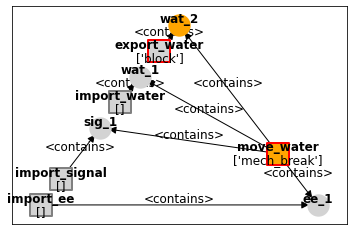

In [120]:
endresults2.graph.draw(figsize=(6,4), withlegend=False)

In [121]:
mdlhist

nominal.i.finished:            array(56)
nominal.i.on:                  array(56)
nominal.flows.ee_1.s.current:  array(56)
nominal.flows.wat_2.s.flowrate: array(56)
nominal.time:                  array(56)
faulty.i.finished:             array(56)
faulty.i.on:                   array(56)
faulty.flows.ee_1.s.current:   array(56)
faulty.flows.wat_2.s.flowrate: array(56)
faulty.time:                   array(56)

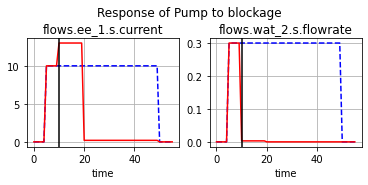

In [125]:
fig, axs = an.plot.hist(mdlhist2, 'flows.ee_1.s.current', 'flows.wat_2.s.flowrate',
                            title = 'Response of Pump to blockage', time_slice=10, legend_loc=False, title_padding=0.1)

### Visualization of resilience metrics
We can also use the processed time history to now make visualizations of the resilience of the system over time. 

In [24]:
heatmaps = an.process.heatmaps(reshist2, diff2)
heatmapstable = an.tabulate.heatmaps(heatmaps)
heatmapstable

,ImportEE,ImportWater,ImportSignal,MoveWater,ExportWater,EE_1,Sig_1,Wat_1,Wat_2
degtime,0.0,0.0,0.0,0.642857,0.821429,0.714286,0.0,0.714286,0.821429
maxdeg,NaN,NaN,NaN,NaN,NaN,2.000000,1.0,4.000000,4.000000
intdeg,NaN,NaN,NaN,NaN,NaN,1.285714,1.0,2.571429,1.750000
maxfaults,0.0,0.0,0.0,1.000000,1.000000,NaN,NaN,NaN,NaN
intdiff,0.0,0.0,0.0,0.321429,0.000000,2.357143,0.0,-42.803705,-42.600402
maxdiff,0.0,0.0,0.0,0.008929,0.000000,0.087500,0.0,0.045982,0.050402


Note: not all of these maps will display values for all functions and flows, as shown by the NaN's in the table. I'll use "degtime" to illustrate.

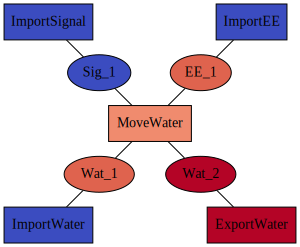

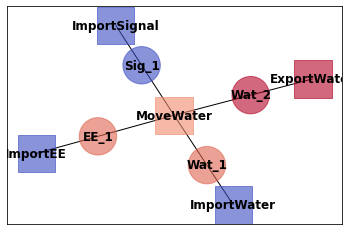

In [25]:
a = an.graph.show(mdl.fxnflowgraph,gtype='fxnflowgraph', heatmap=heatmaps['degtime'], scale=2, pos=pos)
dot = an.graph.show(mdl.fxnflowgraph,gtype='fxnflowgraph', heatmap=heatmaps['degtime'], renderer='graphviz')

These maps can also be plotted on the graph view, where only those for functions will be shown. Here the maximum number of faults is plotted.

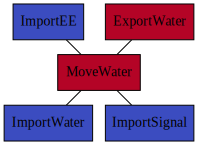

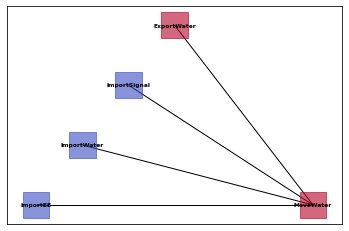

In [26]:
an.graph.show(mdl.graph, heatmap=heatmaps['maxfaults'])
dot = an.graph.show(mdl.graph, heatmap=heatmaps['maxfaults'], renderer='graphviz')

Network metrics can also be overlaid on the graphs:

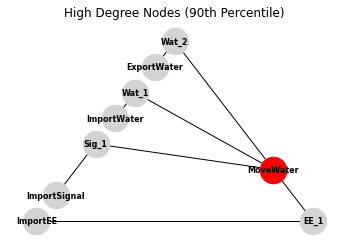

([('MoveWater', 4)],
 <Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'High Degree Nodes (90th Percentile)'}>)

In [27]:
networks.find_high_degree_nodes(mdl,plot='on',gtype='fxnflowgraph')

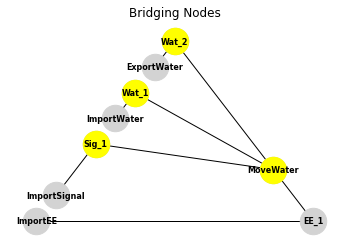

(['MoveWater', 'Sig_1', 'Wat_1', 'Wat_2'],
 <Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Bridging Nodes'}>)

In [28]:
networks.find_bridging_nodes(mdl,plot='on',gtype='fxnflowgraph')

### Running a List of Faults
Finally, to get the results of all of the single-fault scenarios defined in the model, we can run them all at once using the `single_faults()` function. Note that this will propagate faults based on the times vector put in the model, e.g. if mdl.times=[0,3,15,55], it will propogate the faults at the begining, end, and at t=15 and t=15. This function only takes in the model mdl and outputs two similar kinds of output--resultsdict (the results in a python dictionary) and resultstab (the results in a nice tabular form). 

Note that the rates provide for this table do not use the opportunity vector information, instead using the assumption that the fault scenario has the rate provided over the entire simulation.

See below:

In [29]:
endclasses, mdlhists=propagate.single_faults(mdl, staged=True)
simplefmea = an.tabulate.simplefmea(endclasses)
simplefmea[:5]

SCENARIOS COMPLETE: 100%|█████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 188.00it/s]


,rate,cost,expected cost
"ImportEE no_v, t=0",0.000448,20125.0,901600.0
"ImportEE inf_v, t=0",0.000112,25125.0,281400.0
"ImportWater no_wat, t=0",0.000560,11125.0,623000.0
"ImportSignal no_sig, t=0",0.000056,20125.0,112700.0
"MoveWater mech_break, t=0",0.000336,15125.0,508200.0


We can see corresponding degradations using `tabulate.result_summary.fmea()`

In [30]:

fullfmea = an.tabulate.result_summary_fmea(endclasses, mdlhists)
fullfmea[:10]

,degraded functions,degraded flows,rate,cost,expected cost
"ImportEE no_v, t=0",[ImportEE],"[EE_1, Wat_1, Wat_2]",0.000448,20125.0,901600.0
"ImportEE inf_v, t=0",[ImportEE],"[EE_1, Wat_1, Wat_2]",0.000112,25125.0,281400.0
"ImportWater no_wat, t=0",[ImportWater],"[EE_1, Wat_1, Wat_2]",0.00056,11125.0,623000.0
"ImportSignal no_sig, t=0",[ImportSignal],"[EE_1, Sig_1, Wat_1, Wat_2]",0.000056,20125.0,112700.0
"MoveWater mech_break, t=0",[MoveWater],"[EE_1, Wat_1, Wat_2]",0.000336,15125.0,508200.0
"MoveWater short, t=0","[ImportEE, MoveWater]","[EE_1, Wat_1, Wat_2]",0.00056,30125.0,1687000.0
"ExportWater block, t=0","[MoveWater, ExportWater]","[EE_1, Wat_1, Wat_2]",0.00056,20102.5,1125740.0
"ImportEE no_v, t=20",[ImportEE],"[EE_1, Wat_1, Wat_2]",0.000448,16750.0,750400.0
"ImportEE inf_v, t=20",[ImportEE],"[EE_1, Wat_1, Wat_2]",0.000112,21750.0,243600.0
"ImportWater no_wat, t=20",[ImportWater],"[EE_1, Wat_1, Wat_2]",0.00056,7750.0,434000.0


### Running a Fault Sampling Approach
Note that only gives accurate results for costs and fault responses--in order to get an accurate idea of *expected cost*, we instead run an Approach, which develops an underlying probability model for faults. See below.

In [31]:
app = SampleApproach(mdl) #using default parameters--note there are a variety of options for this appraoch

In [32]:
endclasses, mdlhists=propagate.approach(mdl, app, staged=True)
simplefmea = an.tabulate.simplefmea(endclasses) #note the costs are the same, but the rates and expected costs are not
simplefmea[:5]

SCENARIOS COMPLETE: 100%|█████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 195.93it/s]


,rate,cost,expected cost
"ImportEE no_v, t=27",0.000360,15175.0,546300.000000
"ImportEE inf_v, t=27",0.000090,20175.0,181575.000000
"ImportWater no_wat, t=27",0.000150,6175.0,92625.000000
"ImportSignal no_sig, t=27",0.000013,15175.0,19510.714286
"MoveWater mech_break, t=27",0.000231,10175.0,235478.571429


We can now summarize the risks of faults over the operational phases and overall.

In [33]:
phasefmea = an.tabulate.phasefmea(endclasses, app)
phasefmea

rate  expected cost          cost
(ImportEE, inf_v)       (global, on)     0.000090  181575.000000  20175.000000
(ImportEE, no_v)        (global, on)     0.000360  546300.000000  15175.000000
(MoveWater, short)      (global, start)  0.000021   64553.571429  10041.666667
                        (global, on)     0.000129  323678.571429   8391.666667
(ImportSignal, no_sig)  (global, start)  0.000002    4312.500000   6708.333333
(ExportWater, block)    (global, start)  0.000021   43076.785714   6700.833333
(ImportSignal, no_sig)  (global, on)     0.000013   19510.714286   5058.333333
(ExportWater, block)    (global, on)     0.000129  194817.857143   5050.833333
(MoveWater, mech_break) (global, start)  0.000002    3241.071429   5041.666667
(ImportWater, no_wat)   (global, start)  0.000017   18541.666667   3708.333333
(MoveWater, mech_break) (global, on)     0.000231  235478.571429   3391.666667
(ImportSignal, no_sig)  (global, end)    0.000002    1714.285714   3333.333333
(MoveWater, short)      (global, end)    0.000017   17142.857143   3333.333333
(ImportWater, no_wat)   (global, on)     0.000150   92625.000000   2058.333333
(MoveWater, mech_break) (global, end)    0.000003    1285.714286   1666.666667
(ExportWater, block)    (global, end)    0.000017    8571.428571   1666.666667
(ImportWater, no_wat)   (global, end)    0.000020    2000.000000    333.333333

In [34]:
summfmea = an.tabulate.summfmea(endclasses, app)
summfmea

rate  expected cost          cost
MoveWater    short       0.000167  405375.000000  21766.666667
ImportEE     inf_v       0.000090  181575.000000  20175.000000
             no_v        0.000360  546300.000000  15175.000000
ImportSignal no_sig      0.000017   25537.500000  15100.000000
ExportWater  block       0.000167  246466.071429  13418.333333
MoveWater    mech_break  0.000236  240005.357143  10100.000000
ImportWater  no_wat      0.000187  113166.666667   6100.000000

To visualize the results, the histories need to be processed.

Now that these results have been processed, we can use them to visualize the expected resilience of the model to the fault scenarios. Here we will use the average percentage of time degraded

In [36]:
deghists = mdlhists.get_degraded_hist(*mdl.fxns, *mdl.flows)
exp_deg = deghists.get_expected(difference_from_nominal=True)
exp_degtime = exp_deg.get_summary(operator = np.sum)
exp_degtime.as_table()

,ImportEE,ImportWater,ImportSignal,MoveWater,ExportWater,EE_1,Sig_1,Wat_1,Wat_2
0,0.144958,0.091387,0.091387,0.245798,0.091387,0.430672,0.071429,0.42542,0.42542


(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

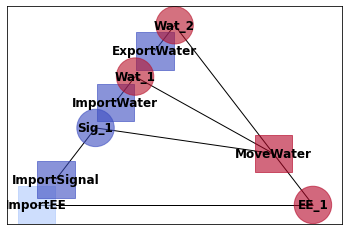

In [37]:
an.graph.show(mdl.fxnflowgraph,  heatmap=exp_degdtime scale=2)

Using this table (and the visualization) we would conclude that in our set of fault scenarios the Wat_1, Wat_2, and EE_1 flows degrade as often as each other. However, this does not tell us which flows are most likely to be degraded based on our simulations. In order to determine that, rate information must be used to get the *expected* degradation of each node.

In [38]:
exp_deg = deghists.get_expected(difference_from_nominal=True, app=app)
exp_degtime = exp_deg.get_summary(operator = np.sum)
exp_degtime.as_table()

,ImportEE,ImportWater,ImportSignal,MoveWater,ExportWater,EE_1,Sig_1,Wat_1,Wat_2
0,0.000319,0.000095,0.000009,0.00027,0.000088,0.000568,0.000007,0.000524,0.000522


The results here are roughly the same, though. The expected degradation of the EE_1 flow is less here than the Wat_1 and Wat_2 flows. 

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

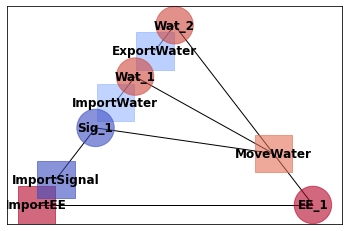

In [39]:
an.graph.show(mdl.fxnflowgraph, heatmap=heatmap2, scale=2)

We can do the same looking at the maximum number of faults occuring in each scenario. 

In [40]:
faulthists = mdlhists.get_degraded_hist(*mdl.fxns, *mdl.flows)
exp_fault = faulthists.get_expected(difference_from_nominal=True)
exp_maxfaults = exp_deg.get_summary(operator = np.max)
exp_maxfaults.as_table()

,ImportEE,ImportWater,ImportSignal,MoveWater,ExportWater
0,0.294118,0.176471,0.176471,0.470588,0.176471


(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

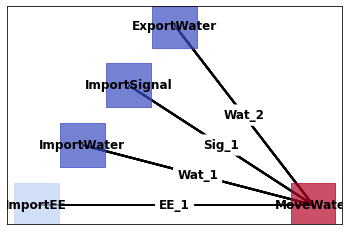

In [41]:
an.graph.show(mdl.graph, heatmap=exp_maxfaults, gtype = 'fxngraph')

MoveWater and ImportEE most commonly have a high number of faults in the list of scenarios. Again, we may be more interested in the expected number, however.

In [42]:
exp_fault = faulthists.get_expected(difference_from_nominal=True, app=app)
exp_maxfaults = exp_deg.get_summary(operator = np.max)
exp_maxfaults.as_table()

,ImportEE,ImportWater,ImportSignal,MoveWater,ExportWater
0,0.000041,0.000011,9.831933e-07,0.000033,0.00001


(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

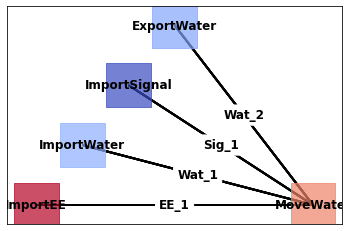

In [43]:
an.graph.show(mdl.graph, heatmap=exp_maxfaults, gtype = 'fxngraph')

So even though ImportEE has faults very commonly in the set of scenarios, when weighted by the occurence of scenarios, the MoveWater function has the most faults.

## Save/Load

In detailed simulations, running a lot of computational simulations can take a considerable amount of time. As a result, it becomes impractical to run a new simulation every time one wishes to analyse its data. Results from fmdtools simulations (endclasses or mdlhists) can be saved as pickle, csv, or json files in this instance using either:
- an.process.save_result() or 
- passing a save_args dictionary to the respective propagate functions (e.g., {'endclass':{'filename':'file.pkl','overwrite':True})

and then loaded using:
- an.process.load_result()

In [44]:
mdlhists

{'ImportEE no_v, t=27': {'flows': {'EE_1': {'current': array([ 0.,  0.,  0.,  0.,  0., 10., 10., 10., 10., 10., 10., 10., 10.,
           10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
           10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
            0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
            0.,  0.,  0.,  0.]),
    'voltage': array([500., 500., 500., 500., 500., 500., 500., 500., 500., 500., 500.,
           500., 500., 500., 500., 500., 500., 500., 500., 500., 500., 500.,
           500., 500., 500., 500., 500.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.])},
   'Sig_1': {'power': array([0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1

This saves a history to a file:

In [45]:
an.process.save_result(mdlhists, "example_mdlhist.pkl", overwrite=True)

File already exists: example_mdlhist.pkl, writing anyway...


And this loads this history:

In [46]:
mdlhists_saved = an.process.load_result("example_mdlhist.pkl")

In [47]:
mdlhists_saved

{'ImportEE no_v, t=27': {'flows': {'EE_1': {'current': array([ 0.,  0.,  0.,  0.,  0., 10., 10., 10., 10., 10., 10., 10., 10.,
           10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
           10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
            0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
            0.,  0.,  0.,  0.]),
    'voltage': array([500., 500., 500., 500., 500., 500., 500., 500., 500., 500., 500.,
           500., 500., 500., 500., 500., 500., 500., 500., 500., 500., 500.,
           500., 500., 500., 500., 500.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.])},
   'Sig_1': {'power': array([0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1

Note that there are different trade-offs to using different file formats:
- pickle is a serialization format, and is thus very fast, but not human-readable. It is also not very secure, and not reccommended for files which will be passed on a network
- csv outputs as comma separated values, which are slower and less robust (in terms of data types), but are human-readable (e.g., excel, etc).
- json is similar to csv, but is less human readable.